In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
import numpy as np

In [8]:
# Estudiemos la dinámica de desgaste de cierto material
tiempo = [22.8, 29.6, 40.4, 47.4, 47.6, 48.1, 48.3, 49.8, 54.5, 57.2, 63.0, 63.6, 65.4, 67.6, 71.6, 72.3, 73.7, 74.6, 79.3, 82.2, 82.6, 94.2, 98.5, 100.2, 109.0, 123.3, 125.5, 127.0, 128.4, 133.7, 147.5, 147.5, 159.9, 165.4, 167.8, 167.8, 172.8, 173.0, 173.6, 175.2, 175.4, 178.8, 186.8, 188.7, 190.6, 193.6, 204.9, 207.3, 215.1, 218.7]

In [9]:
# La pérdida de material en microgramos
medida = [563.9, 525.3, 554.6, 556.5, 609.7, 567.1, 582.0, 540.1, 617.3, 622.8, 625.5, 628.7, 596.9, 631.7, 643.0, 656.3, 664.4, 683.5, 702.6, 749.9, 704.5, 752.4, 735.7, 751.4, 794.5, 825.2, 813.3, 872.6, 851.4, 871.0, 848.8, 835.9, 849.3, 820.2, 869.9, 823.5, 832.1, 818.8, 836.5, 827.1, 796.4, 815.9, 748.2, 656.8, 639.9, 688.3, 550.1, 532.6, 407.1, 299.4]

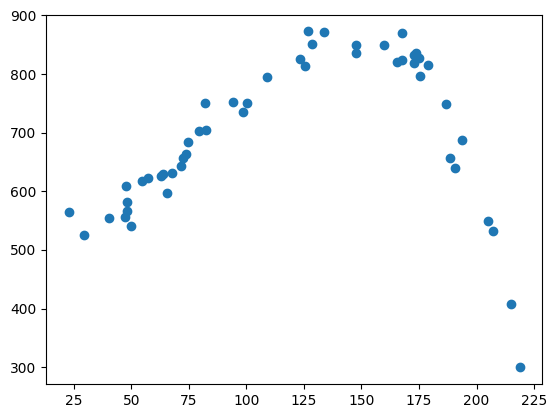

In [18]:
# Veámos ahora su representación gráfica
tiempo = np.array(tiempo).reshape(50,1)
plt.scatter(tiempo, medida)
plt.show()

In [224]:
# Inicializamos la rutina para redes neuronales
clf = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='lbfgs', random_state=15, max_iter=20000, tol=0.005)

In [225]:
# Separamos parte de la información para validar el modelo
tiempo_ensayo, tiempo_contraste, medida_ensayo,  medida_contraste = train_test_split(tiempo, medida, test_size=0.3, random_state=5)

In [226]:
# Usamos la información restante para desarrollar el modelo 
clf.fit(tiempo_ensayo, medida_ensayo)

MLPRegressor(activation='logistic', max_iter=20000, random_state=15,
             solver='lbfgs', tol=0.005)

In [235]:
# Una vez completado el desarrollo, los parámetros del módelos son calculados, y se puede hacer estimaciones
# Comparando la estimación con la información real en porcentaje
100*(medida_contraste - clf.predict(tiempo_contraste))/medida_contraste

array([11.29501334,  4.93837467,  6.12727618,  7.73935722,  3.08800831,
        3.39505264,  3.94610113, -1.05069056,  2.60606999,  0.67125723,
        0.49738965, 10.96972464,  1.9259892 ,  6.27272051, -2.68387659])

In [236]:
# Por último podemos calificar la fiabilidad del modelo
clf.score(tiempo_contraste, medida_contraste)

0.8819438379789885

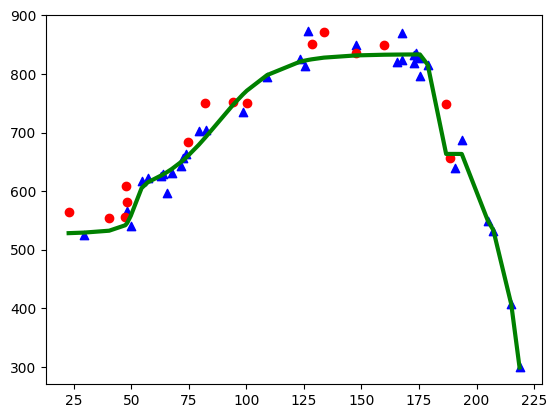

In [237]:
medida_prediccion = clf.predict(tiempo)
plt.scatter(tiempo_ensayo, medida_ensayo, color="blue", marker='^')
plt.scatter(tiempo_contraste, medida_contraste, color="red")
plt.plot(tiempo, medida_prediccion, color="green", linewidth=3)
plt.show()